In [6]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from tqdm import tnrange, tqdm_notebook, tqdm

In [6]:
%load_ext autoreload
%autoreload 2

In [1]:
from numpyGillespie import Gillespie as gil

In [2]:
# Define some testing values.
# The list of initial values of species to will track
X = [1000,]

# The list of rate constants
C = [0.5,]

# the change in X that results from the change from rate constant c
# in this case X = X - 1
# since one X decays and we do not track the decay product
change = [lambda u: (u[0] - 1),]
# Where u[0] takes the first element from the X list

# and the H value is the number of distinct R, molecular reactant
# combinations available in the state
# In this case one for each
perm = [lambda u: (u[0]),]

In [3]:
out = gil(X, C, change, perm, max_sim_rxn=1000).simulate()

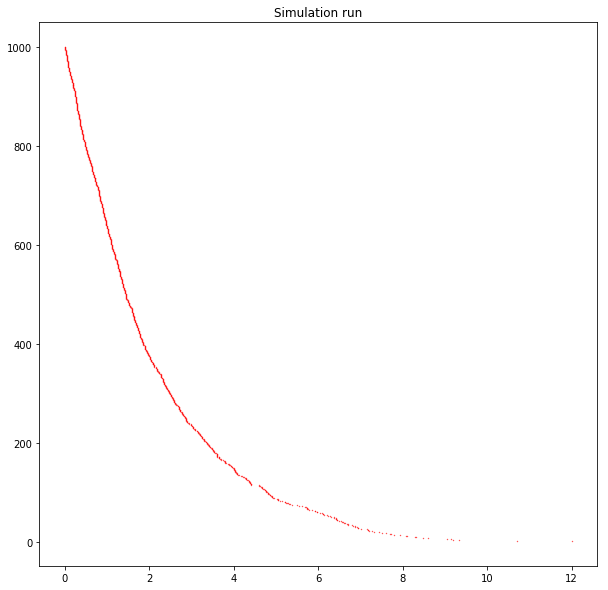

In [9]:
plt.figure(1, figsize=(10,10))
plt.scatter(out[0], [y[0] for y in out[1]], marker=".", s=.5, alpha=0.9, color = 'r')
plt.title("Simulation run")
plt.show()

In [21]:
exp_runs = list()

for i in tqdm(range(100), desc="Running simulations"):
    exp_runs.append(gil(X, C, change, perm, max_sim_rxn=1000).simulate())


Running simulations: 100%|██████████| 100/100 [00:01<00:00, 56.99it/s]


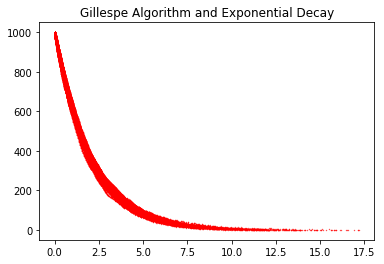

In [22]:
for run in exp_runs:
    # unzip the data
    r = zip(*run)
    t, x = zip(*r)
    plt.scatter(run[0], [y[0] for y in run[1]], marker=".", s=.5, alpha=0.9, color = 'r')
    
    
plt.title('Gillespe Algorithm and Exponential Decay')
plt.show()